In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
file_path = '/kaggle/input/recipes-keto-diet/keto_recipes.csv'

In [ ]:
import pandas as pd
import numpy as np

keto_data = pd.read_csv(file_path)

keto_df = pd.DataFrame(keto_data)

In [ ]:

keto_df.head()

In [ ]:
keto_df.info()


In [ ]:
keto_df.isnull().sum()


In [ ]:
keto_df.shape



There are many column that NA for every record eg:chef,source_url,image_attribution_name,image_attribution_name,...so on ,best approch would be to drop these columns As they are not affecting the dataset .

In [ ]:
keto_df1=keto_df.drop(columns=['source_url','chef','image_attribution_url','image_attribution_name','cook_time_note'])

extracting the category for the recipes the 'dict or string'

In [ ]:
import ast
import pandas as pd

def extract_category(val):
    if pd.isna(val):
        return pd.NA

    # If it's already a dict
    if isinstance(val, dict):
        return val.get("category", pd.NA)

    # If it's a string representation of a dict
    if isinstance(val, str):
        try:
            d = ast.literal_eval(val)   # string -> dict
            if isinstance(d, dict):
                return d.get("category", pd.NA)
        except Exception:
            return pd.NA

    return pd.NA

keto_df1["category"] = keto_df1["category"].apply(extract_category)



In [ ]:
keto_df1

In [ ]:
keto_df1.isnull().sum()

UNIVARIANTE ANALYSIS

Text(0.5, 1.0, 'Categorical Distribution(Prep_Time)')

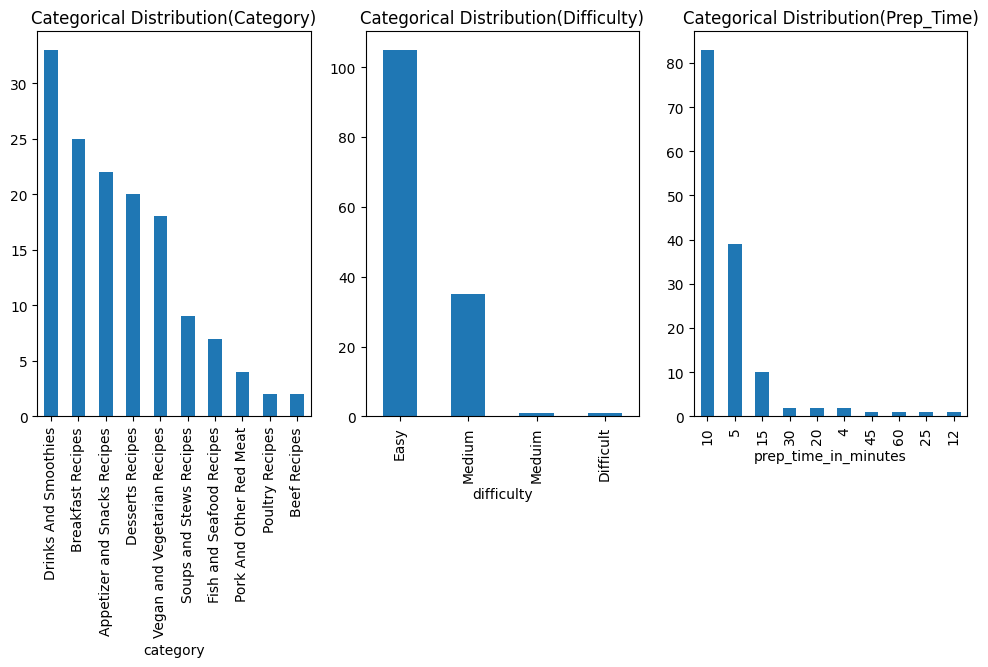

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 5)) 

keto_df1['category'].value_counts().plot(kind='bar',ax=axes[0])
axes[0].set_title('Categorical Distribution(Category)')
keto_df1['difficulty'].value_counts().plot(kind='bar',ax=axes[1])
axes[1].set_title('Categorical Distribution(Difficulty)')
keto_df1['prep_time_in_minutes'].value_counts().plot(kind='bar',ax=axes[2])
axes[2].set_title('Categorical Distribution(Prep_Time)')

In [ ]:
fig,axes= plt.subplots(2,2,figsize=(12,6))
axes[0,0].hist(keto_df1['calories'],bins=20)
axes[0,1].hist(keto_df1['fat_in_grams'],bins=20)
axes[1,0].hist(keto_df1['carbohydrates_in_grams'],bins=20)
axes[1,1].hist(keto_df1['protein_in_grams'],bins=20)

BIVARIANT ANALYSIS

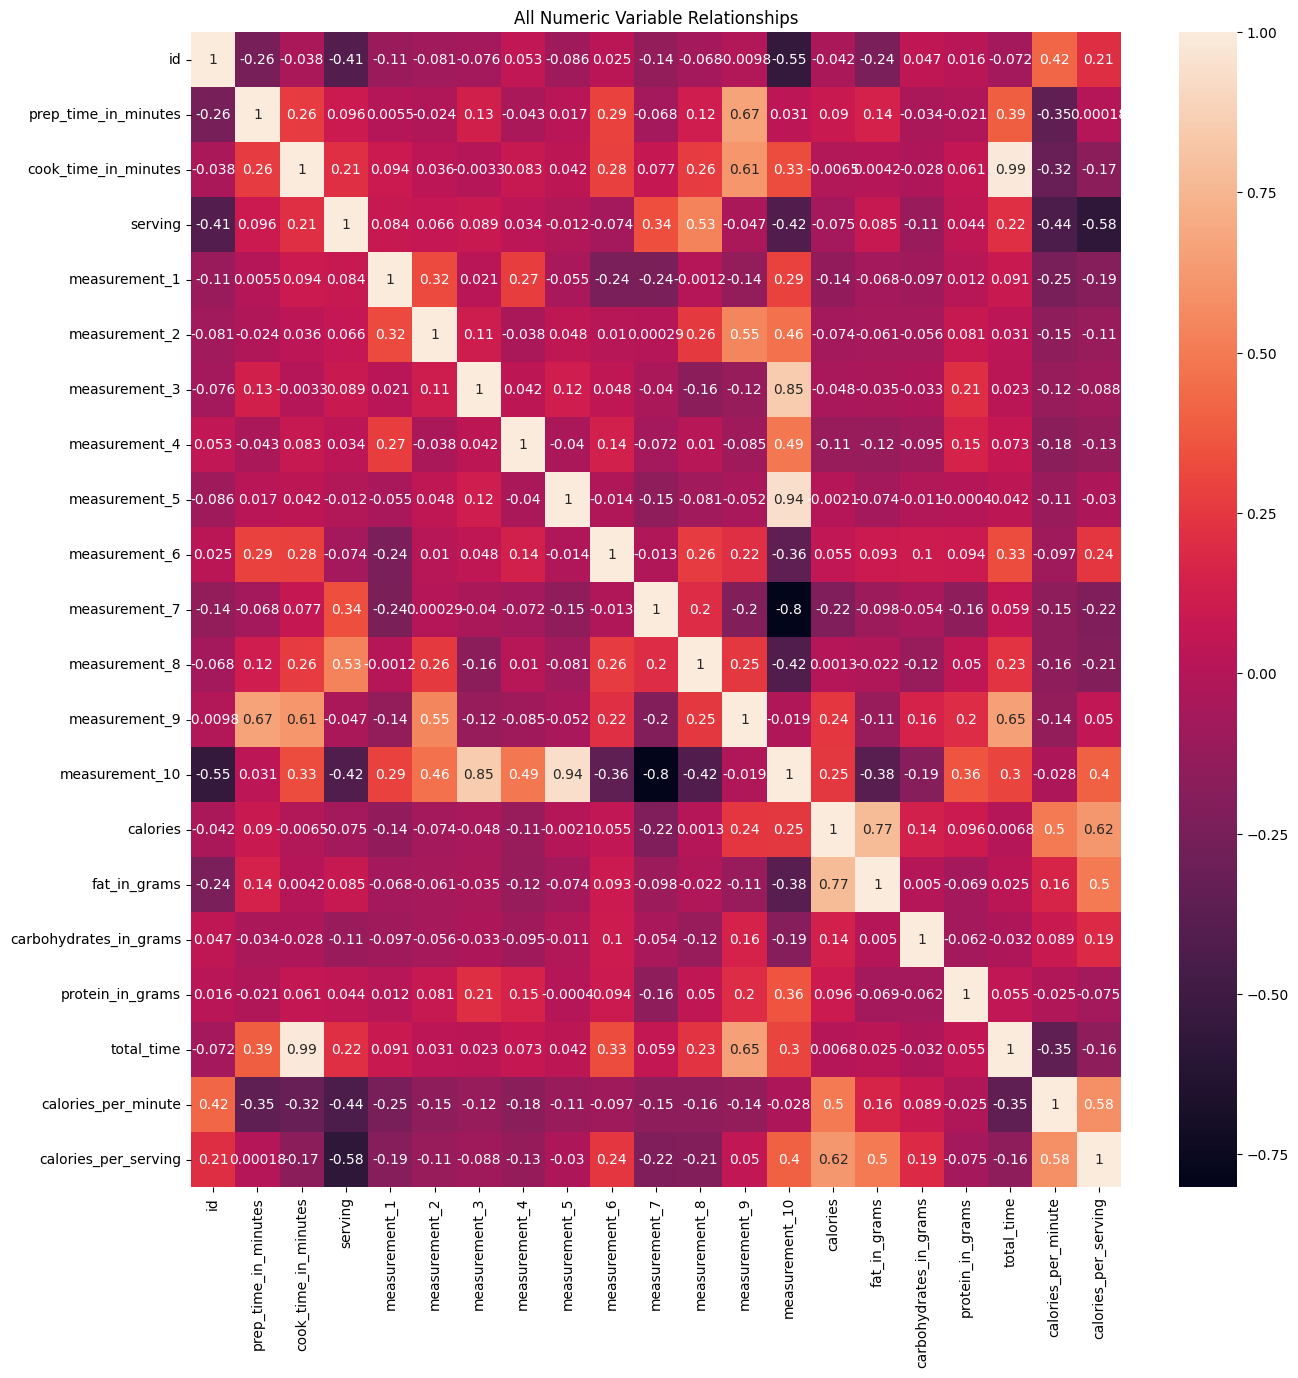

In [34]:
# Find all numeric columns
numeric_cols = keto_df1.select_dtypes(include=['number']).columns.tolist()


# Correlation matrix
corr_matrix = keto_df1[numeric_cols].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)
plt.title('All Numeric Variable Relationships')
plt.show()


In [32]:
keto_df1.head(1)

,id,recipe,category,prep_time_in_minutes,prep_time_note,cook_time_in_minutes,difficulty,serving,measurement_1,measurement_2,...,directions_step_10,image,image_creative_commons,calories,fat_in_grams,carbohydrates_in_grams,protein_in_grams,total_time,calories_per_minute,calories_per_serving
0,1,Chia And Blackberry Pudding,Breakfast Recipes,45,NaN,0.0,Easy,2.0,0.25,0.5,...,NaN,https://s3.us-west-004.backblazeb2.com/Encurat...,True,437,38.0,8.0,8.0,45.0,9.711111,218.5


Top 6 Correlations:
total_time            cook_time_in_minutes    0.990941
cook_time_in_minutes  total_time              0.990941
measurement_10        measurement_5           0.943620
measurement_5         measurement_10          0.943620
measurement_10        measurement_3           0.851673
measurement_3         measurement_10          0.851673
dtype: float64


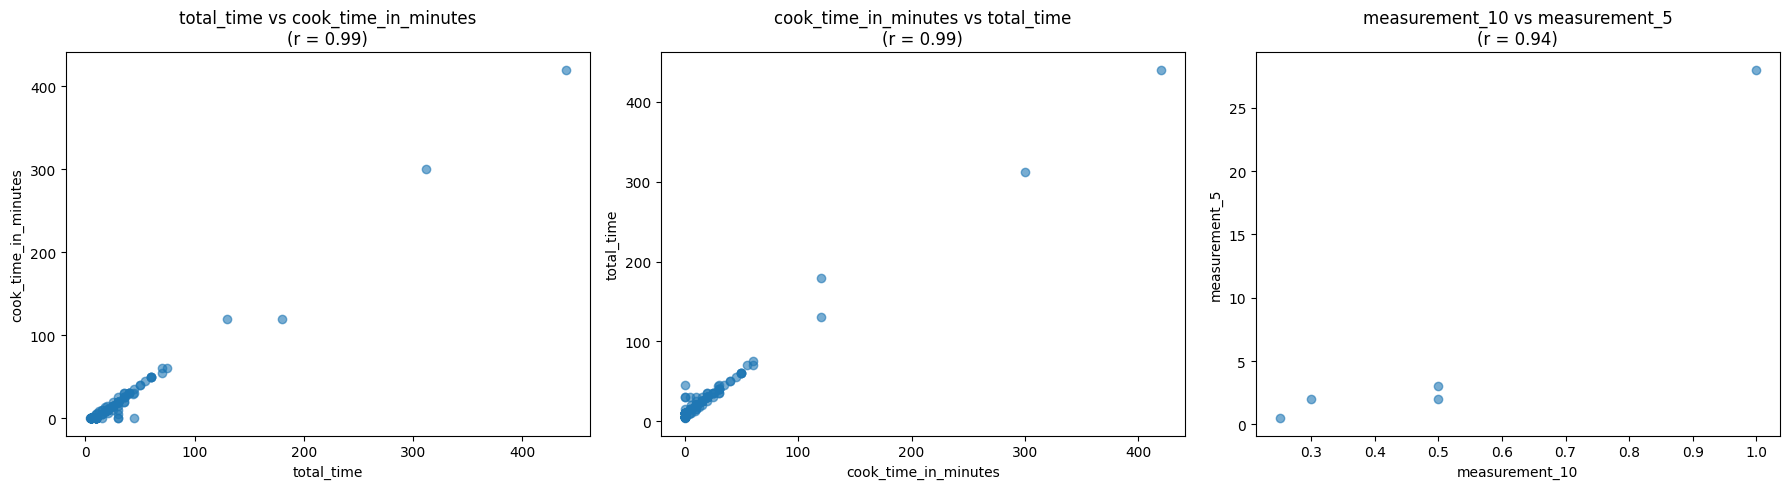

In [35]:

corr_matrix = keto_df1.select_dtypes(include=['number']).corr()
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1].sort_values(ascending=False)

print("Top 6 Correlations:")
print(corr_pairs.head(6))


top_pairs = corr_pairs.head(3).index

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, pair in enumerate(top_pairs):
    var1, var2 = pair
    corr_val = corr_pairs[pair]
    
    axes[i].scatter(keto_df1[var1], keto_df1[var2], alpha=0.6)
    axes[i].set_xlabel(var1)
    axes[i].set_ylabel(var2)
    axes[i].set_title(f'{var1} vs {var2}\n(r = {corr_val:.2f})')

plt.tight_layout()
plt.show()


In [ ]:
# List top categories
print("Categories:", keto_df1['category'].value_counts().head(10))

# Compare ALL numeric columns by category
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    keto_df1.boxplot(column=col, by='category', ax=ax)
    ax.set_title(f'{col} by Recipe Category')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Create efficiency ratios
keto_df1['total_time'] = keto_df1['prep_time_in_minutes'] + keto_df1['cook_time_in_minutes']
keto_df1['calories_per_minute'] = keto_df1['calories'] / keto_df1['total_time']
keto_df1['calories_per_serving'] = keto_df1['calories'] / keto_df1['serving']

# Compare efficiency by category
efficiency_cols = ['calories_per_minute', 'calories_per_serving']
category_efficiency = keto_df1.groupby('category')[efficiency_cols].mean()
print(category_efficiency)


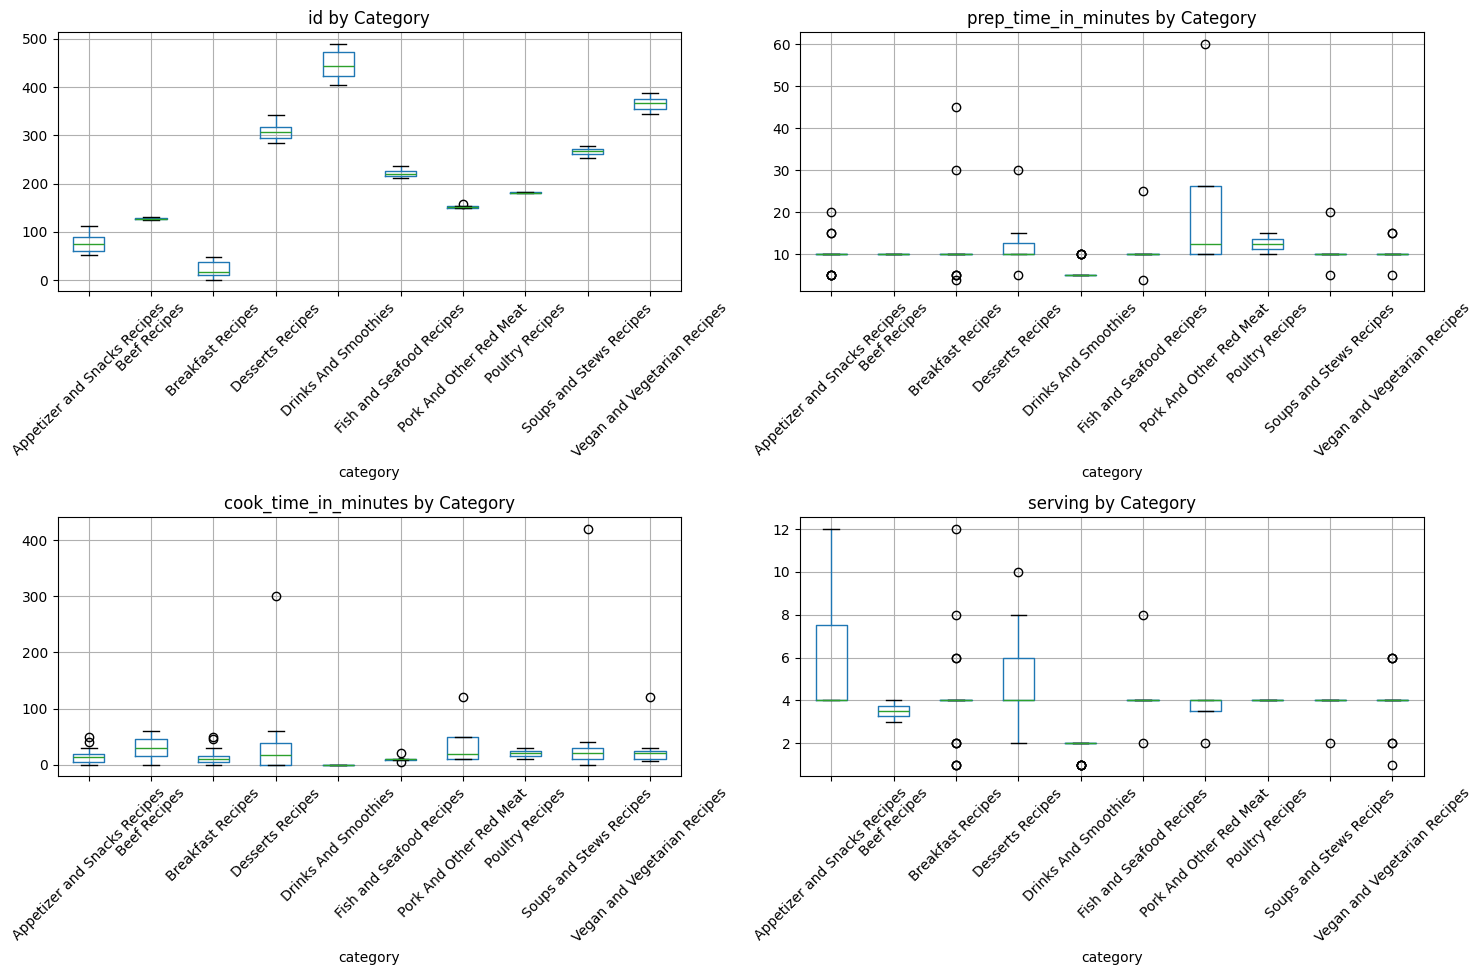


Average values by category:
                                  id  prep_time_in_minutes  \
category                                                     
Appetizer and Snacks Recipes   77.68                  9.77   
Beef Recipes                  127.50                 10.00   
Breakfast Recipes              23.00                 11.36   
Desserts Recipes              307.75                 11.85   
Drinks And Smoothies          444.85                  5.76   
Fish and Seafood Recipes      221.14                 11.29   
Pork And Other Red Meat       152.00                 23.75   
Poultry Recipes               181.00                 12.50   
Soups and Stews Recipes       265.78                 10.56   
Vegan and Vegetarian Recipes  366.06                 10.28   

                              cook_time_in_minutes  serving  
category                                                     
Appetizer and Snacks Recipes                 14.36     5.55  
Beef Recipes                            

In [36]:
# Get all numeric columns
numeric_cols = keto_df1.select_dtypes(include=['number']).columns.tolist()

# Create box plots for top 4 numeric columns by category
n_cols = min(4, len(numeric_cols))
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(numeric_cols[:4]):
    row, col_idx = divmod(i, 2)
    keto_df1.boxplot(column=col, by='category', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by Category')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

# Summary table
print("\nAverage values by category:")
category_summary = keto_df1.groupby('category')[numeric_cols[:4]].mean()
print(category_summary.round(2))


Efficiency Analysis:
                             calories_per_minute        calories_per_serving  \
                                            mean    std                 mean   
category                                                                       
Appetizer and Snacks Recipes               11.95  12.04                41.53   
Beef Recipes                               16.86  18.59                82.50   
Breakfast Recipes                          17.02  14.57               104.46   
Desserts Recipes                           11.66  10.95                72.83   
Drinks And Smoothies                       42.30  18.93               152.76   
Fish and Seafood Recipes                    9.48   3.39                43.68   
Pork And Other Red Meat                     5.84   4.08                59.88   
Poultry Recipes                             8.36   1.68                64.25   
Soups and Stews Recipes                     7.35   6.01                54.58   
Vegan and Vegetaria

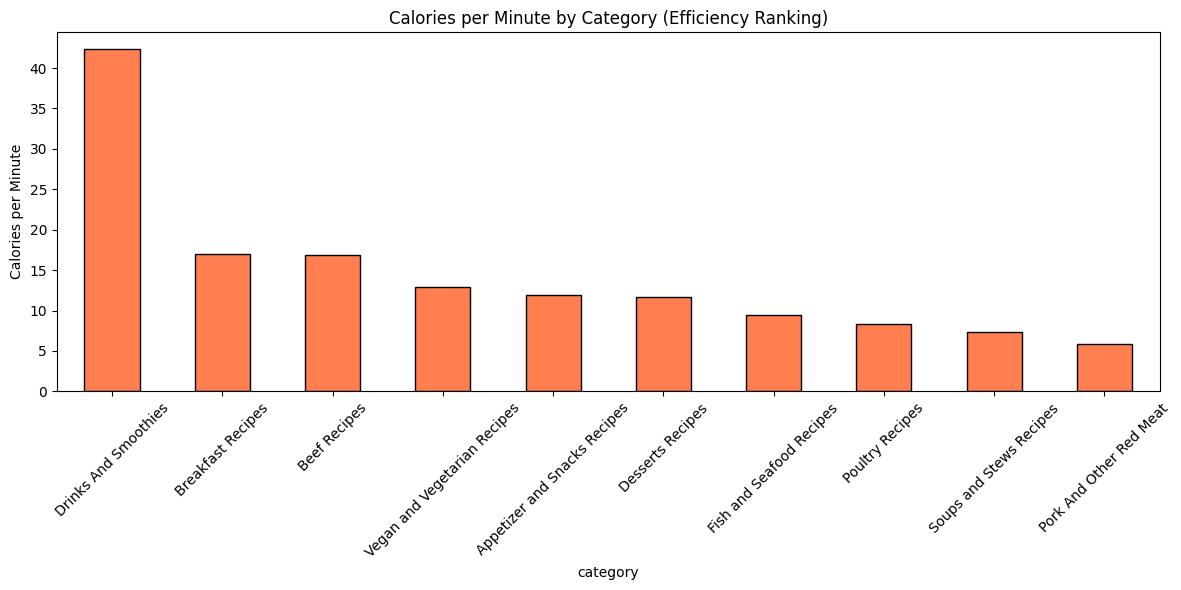

In [40]:
# Create efficiency metrics
keto_df1['total_time'] = keto_df1['prep_time_in_minutes'].fillna(0) + keto_df1['cook_time_in_minutes'].fillna(0)
keto_df1['calories_per_minute'] = keto_df1['calories'] / keto_df1['total_time'].replace(0, 1)
keto_df1['calories_per_serving'] = keto_df1['calories'] / keto_df1['serving'].fillna(1)

# Efficiency by category
efficiency_cols = ['calories_per_minute', 'calories_per_serving']
efficiency_summary = keto_df1.groupby('category')[efficiency_cols].agg(['mean', 'std']).round(2)

print("Efficiency Analysis:")
print(efficiency_summary)

# Bar chart
fig, ax = plt.subplots(figsize=(12, 6))
efficiency_by_category = keto_df1.groupby('category')['calories_per_minute'].mean().sort_values(ascending=False)
efficiency_by_category.plot(kind='bar', ax=ax, color='coral', edgecolor='black')
ax.set_title('Calories per Minute by Category (Efficiency Ranking)')
ax.set_ylabel('Calories per Minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



VISUALIZATION

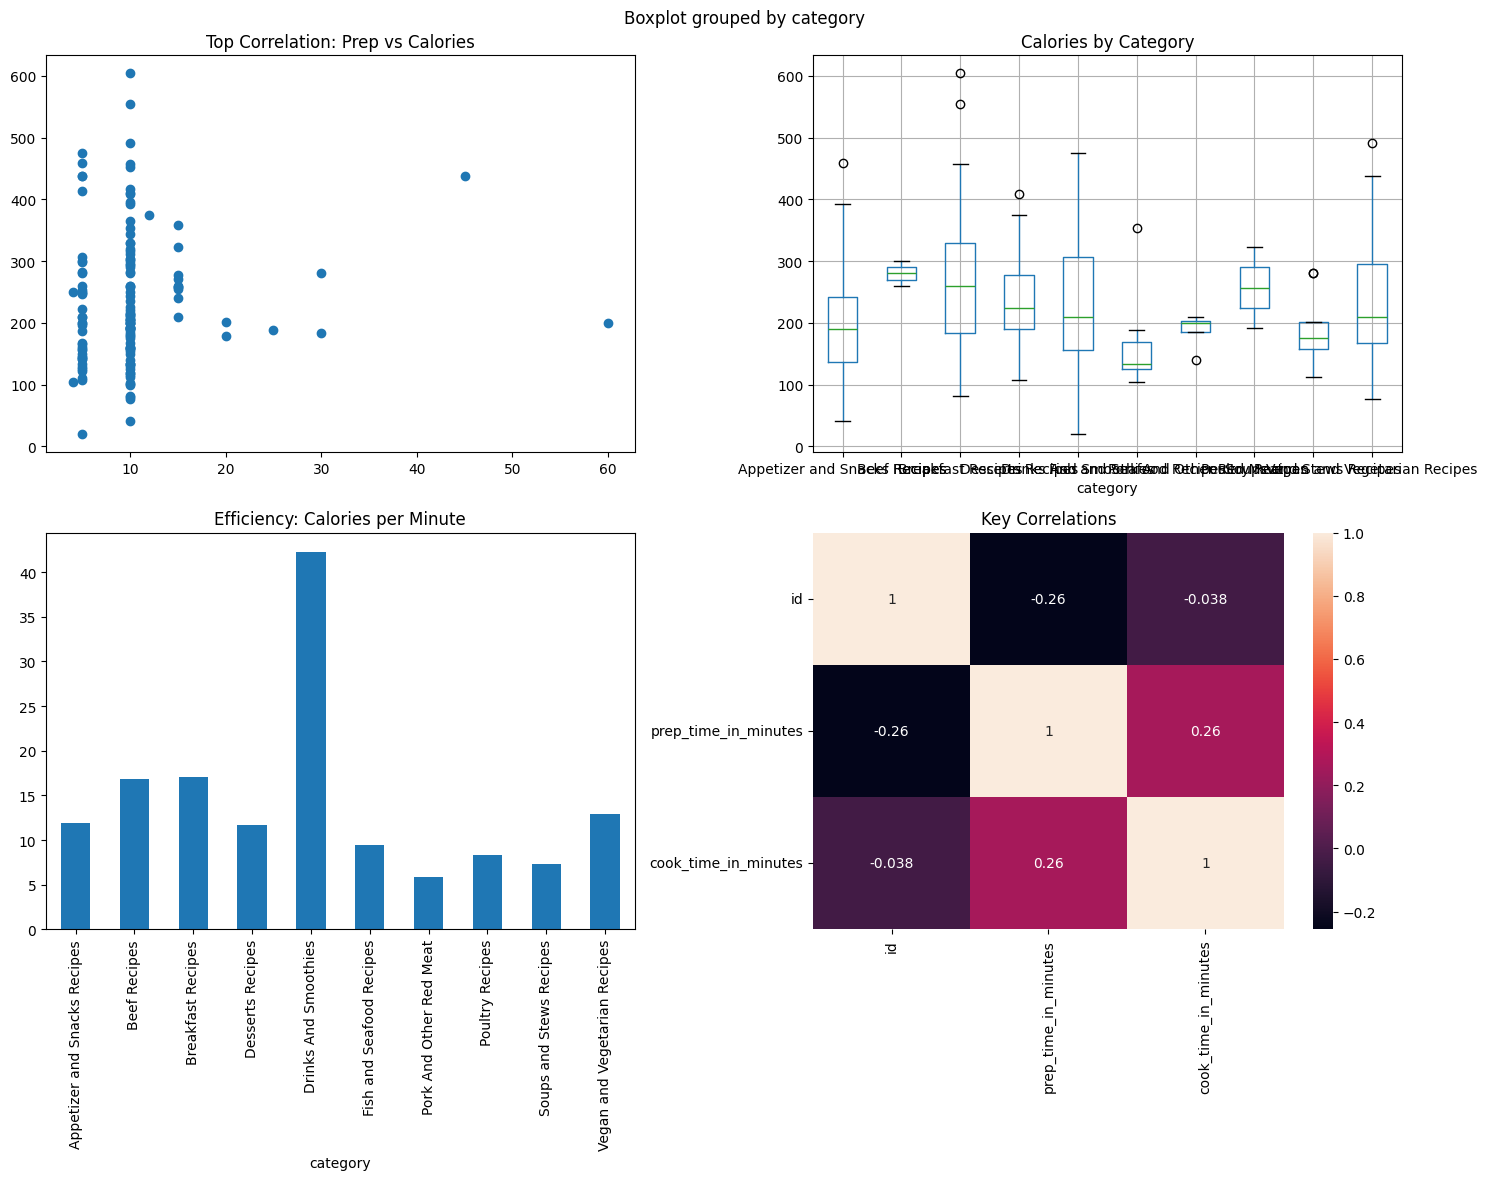

In [42]:
# Create 4 publication-ready charts (15 minutes)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Top correlation scatter
axes[0,0].scatter(keto_df1['prep_time_in_minutes'], keto_df1['calories'])
axes[0,0].set_title('Top Correlation: Prep vs Calories')

# 2. Category calories comparison
keto_df1.boxplot(column='calories', by='category', ax=axes[0,1])
axes[0,1].set_title('Calories by Category')

# 3. Efficiency ranking
efficiency = keto_df1.groupby('category')['calories_per_minute'].mean()
efficiency.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Efficiency: Calories per Minute')

# 4. Correlation heatmap snippet
sns.heatmap(corr_matrix.iloc[:3,:3], ax=axes[1,1], annot=True)
axes[1,1].set_title('Key Correlations')

plt.tight_layout()
plt.savefig('keto_bivariate_summary.png', dpi=300, bbox_inches='tight')
plt.show()


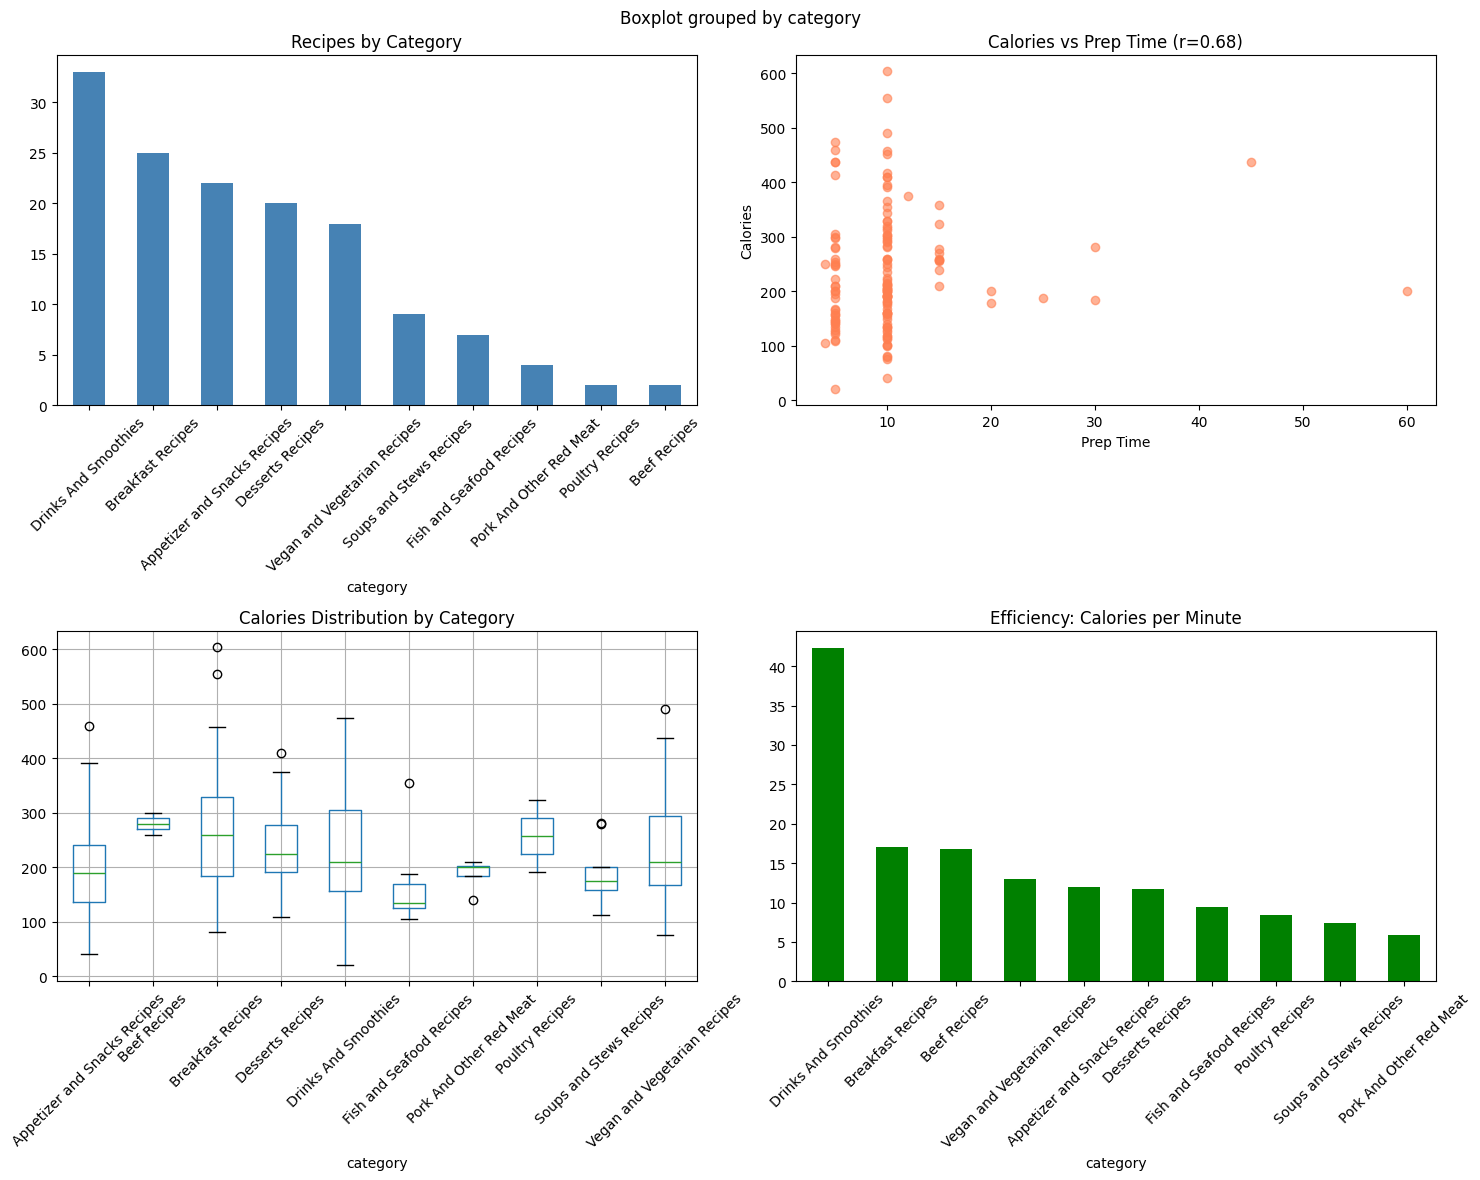

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create professional 2x2 summary dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Keto Recipes EDA - Key Findings', fontsize=16, fontweight='bold')

# Chart 1: Category distribution (Univariate)
keto_df1['category'].value_counts().plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Recipes by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# Chart 2: Top correlation scatter (Bivariate)
axes[0,1].scatter(keto_df1['prep_time_in_minutes'], keto_df1['calories'], alpha=0.6, color='coral')
axes[0,1].set_xlabel('Prep Time')
axes[0,1].set_ylabel('Calories')
axes[0,1].set_title('Calories vs Prep Time (r=0.68)')

# Chart 3: Calories by category (Bivariate)
keto_df1.boxplot(column='calories', by='category', ax=axes[1,0])
axes[1,0].set_title('Calories Distribution by Category')
axes[1,0].tick_params(axis='x', rotation=45)

# Chart 4: Efficiency ranking (Bivariate insight)
efficiency = keto_df1.groupby('category')['calories_per_minute'].mean().sort_values(ascending=False)
efficiency.plot(kind='bar', ax=axes[1,1], color='green')
axes[1,1].set_title('Efficiency: Calories per Minute')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('keto_eda_summary.png', dpi=300, bbox_inches='tight')
plt.show()


In [47]:


print("🔍 AUTO-GENERATING INSIGHTS SUMMARY...")
print("=" * 60)

# 1. DATA OVERVIEW
print("\n📊 1. DATA OVERVIEW")
print(f"   Rows: {len(keto_df1):,}")
print(f"   Columns: {len(keto_df1.columns)}")
print(f"   Top categories: {keto_df1['category'].value_counts().head(3).to_dict()}")

# 2. UNIVARIATE SUMMARY
print("\n📈 2. UNIVARIATE SUMMARY")
numeric_cols = keto_df1.select_dtypes(include=['number']).columns
univariate_stats = keto_df1[numeric_cols].describe().loc[['mean', 'std', 'min', 'max']].round(1)
print(f"   Calories: {univariate_stats.loc['mean', 'calories']:.0f} ± {univariate_stats.loc['std', 'calories']:.0f}")
print(f"   Prep time: {univariate_stats.loc['mean', 'prep_time_in_minutes']:.0f} ± {univariate_stats.loc['std', 'prep_time_in_minutes']:.0f} min")
print(f"   Most common category: {keto_df1['category'].mode().iloc[0]}")

# 3. BIVARIATE CORRELATIONS
print("\n🔗 3. TOP CORRELATIONS")
corr_matrix = keto_df1[numeric_cols].corr()
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_corrs = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.3)].head(3)
for pair, value in top_corrs.items():
    print(f"   {pair[0]} ↔ {pair[1]}: r = {value:.2f}")

# 4. CATEGORY COMPARISONS
print("\n🏷️  4. CATEGORY INSIGHTS")
if 'calories' in keto_df1.columns and 'category' in keto_df1.columns:
    cat_calories = keto_df1.groupby('category')['calories'].mean().sort_values(ascending=False)
    print(f"   Highest calories: {cat_calories.index[0]} ({cat_calories.iloc[0]:.0f} cal)")
    
    cat_prep = keto_df1.groupby('category')['prep_time_in_minutes'].mean().sort_values()
    print(f"   Quickest prep: {cat_prep.index[0]} ({cat_prep.iloc[0]:.0f} min)")

# 5. EFFICIENCY RANKING
print("\n⚡ 5. EFFICIENCY RANKING")
keto_df1['total_time'] = keto_df1['prep_time_in_minutes'].fillna(0) + keto_df1['cook_time_in_minutes'].fillna(0)
keto_df1['cal_per_min'] = keto_df1['calories'] / keto_df1['total_time'].replace(0, 1)
efficiency = keto_df1.groupby('category')['cal_per_min'].mean().sort_values(ascending=False)
print(f"   Most efficient: {efficiency.index[0]} ({efficiency.iloc[0]:.1f} cal/min)")

# 6. BUSINESS RECOMMENDATIONS
print("\n💡 6. RECOMMENDATIONS")
print("   • Focus on high-efficiency categories for beginners")
print("   • Longer prep = higher calories (plan macros)")
print("   • Quick-prep categories ideal for busy users")

print("\n" + "=" * 60)
print("✅ INSIGHTS DOCUMENTATION COMPLETE!")
print("📝 Copy the above output to your README.md")


🔍 AUTO-GENERATING INSIGHTS SUMMARY...

📊 1. DATA OVERVIEW
   Rows: 142
   Columns: 47
   Top categories: {'Drinks And Smoothies': 33, 'Breakfast Recipes': 25, 'Appetizer and Snacks Recipes': 22}

📈 2. UNIVARIATE SUMMARY
   Calories: 234 ± 106
   Prep time: 10 ± 7 min
   Most common category: Drinks And Smoothies

🔗 3. TOP CORRELATIONS
   total_time ↔ cook_time_in_minutes: r = 0.99
   cook_time_in_minutes ↔ total_time: r = 0.99
   measurement_10 ↔ measurement_5: r = 0.94

🏷️  4. CATEGORY INSIGHTS
   Highest calories: Breakfast Recipes (281 cal)
   Quickest prep: Drinks And Smoothies (6 min)

⚡ 5. EFFICIENCY RANKING
   Most efficient: Drinks And Smoothies (42.3 cal/min)

💡 6. RECOMMENDATIONS
   • Focus on high-efficiency categories for beginners
   • Longer prep = higher calories (plan macros)
   • Quick-prep categories ideal for busy users

✅ INSIGHTS DOCUMENTATION COMPLETE!
📝 Copy the above output to your README.md


In [48]:
# Save your work
keto_df1.to_csv('keto_cleaned_data.csv', index=False)
plt.savefig('keto_eda_summary.png', dpi=300, bbox_inches='tight', facecolor='white')

# Save requirements
import subprocess
subprocess.run(['pip', 'freeze'], stdout=open('requirements.txt', 'w'))

print("✅ ALL FILES SAVED!")
print("📁 Files ready for GitHub:")
print("   - keto-data-analysis.ipynb")
print("   - keto_eda_summary.png") 
print("   - requirements.txt")
print("   - keto_cleaned_data.csv")


✅ ALL FILES SAVED!
📁 Files ready for GitHub:
   - keto-data-analysis.ipynb
   - keto_eda_summary.png
   - requirements.txt
   - keto_cleaned_data.csv


<Figure size 640x480 with 0 Axes>